# Problem Set #3

MACS 30000, Dr. Evans

Haihao Guo

## Exercise 1

### A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/COVIDincubation.txt')
df1 = df.loc[(df["age"] <= 40)]
df2 = df.loc[(df["age"] > 40)]
X = np.array(df['symp_days'])
X1 = np.array(df1['symp_days'])
X2 = np.array(df2['symp_days'])

Text(0,0.5,'Density')

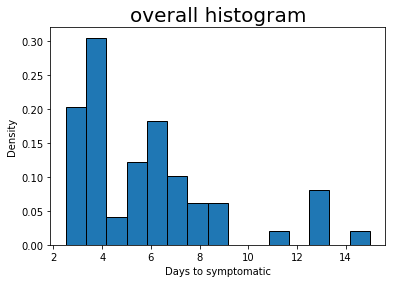

In [2]:
num_bins = 15
count, bins, ignored = plt.hist(df['symp_days'], num_bins, edgecolor='k', density=True)
plt.title('overall histogram', fontsize=20)
plt.xlabel(r'Days to symptomatic')
plt.ylabel('Density')

Text(0,0.5,'Density')

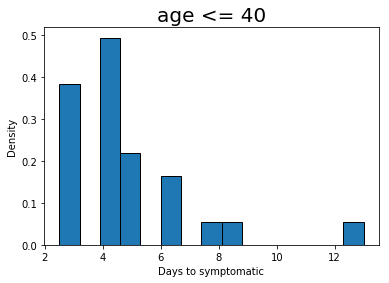

In [3]:
num_bins = 15
count, bins, ignored = plt.hist(df1['symp_days'], num_bins, edgecolor='k', density=True)
plt.title('age <= 40', fontsize=20)
plt.xlabel(r'Days to symptomatic')
plt.ylabel('Density')

Text(0,0.5,'Density')

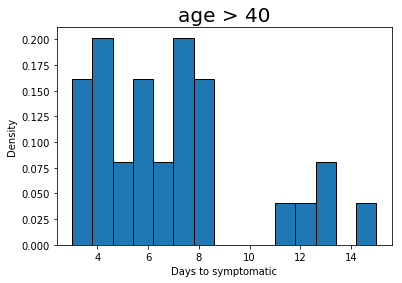

In [4]:
num_bins = 15
count, bins, ignored = plt.hist(df2['symp_days'], num_bins, edgecolor='k', density=True)
plt.title('age > 40', fontsize=20)
plt.xlabel(r'Days to symptomatic')
plt.ylabel('Density')

### B

In [8]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid1 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid2 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())

grid.fit(X[:, None])
grid1.fit(X1[:, None])
grid2.fit(X2[:, None])

GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10092715,  0.1018629 ,  0.10280732,  0.1037605 ,
        0.10472252,  0.10569346,  0.10667339,  0.10766...
        8.01323013,  8.08752491,  8.16250851,  8.23818733,  8.31456781,
        8.39165644,  8.46945981,  8.54798453,  8.62723729,  8.70722485,
        8.78795401,  8.86943166,  8.95166472,  9.03466021,  9.1184252 ,
        9.20296681,  9.28829225,  9.37440879,  9.46132376,  9.54904456,
        9.63757866,  9.72693362,  9.81711702,  9.90813657, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

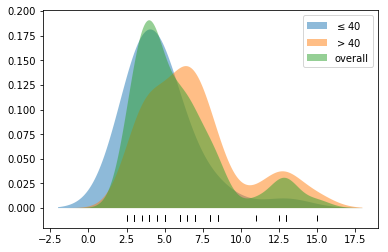

In [19]:
from sklearn.neighbors import KernelDensity

best_band = grid.best_params_['bandwidth']
best_band1 = grid1.best_params_['bandwidth']
best_band2 = grid2.best_params_['bandwidth']

kde = KernelDensity(bandwidth=best_band, kernel='gaussian')
kde.fit(X[:, None])

kde1 = KernelDensity(bandwidth=best_band1, kernel='gaussian')
kde1.fit(X1[:, None])

kde2 = KernelDensity(bandwidth=best_band2, kernel='gaussian')
kde2.fit(X2[:, None])

x_d = np.linspace(-2, 18, 1000)
logprob = kde.score_samples(x_d[:, None])
logprob2 = kde2.score_samples(x_d[:, None])
logprob1 = kde1.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob1), alpha=0.5, label='$\leq 40$')
plt.fill_between(x_d, np.exp(logprob2), alpha=0.5, label='$> 40$')
plt.fill_between(x_d, np.exp(logprob), alpha=0.5, label='overall')
plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1)
plt.legend(loc='upper right')

In [10]:
print('My optimal bandwidths for the KDE (overall) is {}'.format(grid.best_params_))
print('My optimal bandwidths for the KDE (a <= 40) is {}'.format(grid1.best_params_))
print('My optimal bandwidths for the KDE (a > 40) is {}'.format(grid2.best_params_))

My optimal bandwidths for the KDE (overall) is {'bandwidth': 0.8910453324821516}
My optimal bandwidths for the KDE (a <= 40) is {'bandwidth': 1.6233824316122782}
My optimal bandwidths for the KDE (a > 40) is {'bandwidth': 1.1861737164524786}


### C

I could get the following informations from the result:

On average, The individuals with the age $\leq 40$ has generally shorter incubation periods than individuals with the age $> 40$.





## Exercise 2

### A

In [23]:
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

In [24]:
print('Shape of bq_data', bq_data.shape)
print('Bequest distribution by income group:',
      bq_data.sum(axis=0))
print('Sum of all probabilities', bq_data.sum())

Shape of bq_data (73, 7)
Bequest distribution by income group: [0.01214584 0.00817072 0.01590964 0.0139963  0.01383075 0.06927237
 0.86667437]
Sum of all probabilities 1.0000000000000002


Text(0.5,0,'Percent of BQ received')

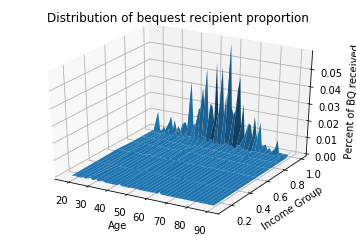

In [25]:
from mpl_toolkits.mplot3d import Axes3D

age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

### B

In [26]:
bq_ind = pd.read_csv('data/BQ_ind_data.txt')

In [29]:
bq_ind_mat = bq_ind.values
kde_density = gaussian_kde(bq_ind_mat.T, bw_method=0.3)
age = bq_ind['age']
income = bq_ind['income_pctl']
age_pos, income_pos = np.mgrid[age.min():age.max():73j, income.min():income.max():7j]
freq_pos = np.reshape(kde_density(np.vstack([age_pos.ravel(), income_pos.ravel()])), age_pos.shape)

Text(0.5,0,'Percent of BQ received')

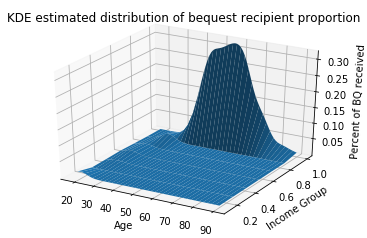

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_pos, income_pos, freq_pos)
ax.set_title('KDE estimated distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

This graph tells us that there is a smooth surface at $\lambda = 0.3$, which would gives us a result that is neither overfitting nor underfitting the data.

In [32]:
freq_pos[44][5]

4.928396254748915e-05

the estimated density for bequest recipients who are age 61 in the 6th lifetime income category (j = 6, 90th to 99th percentile) is 4.928396254748915e-05.